In [16]:
import pandas as pd

# Load the dataset from the provided CSV file
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Display the first few rows
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Get a concise summary of the DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# Check for missing values in each column
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df.drop(columns=['Cabin'], inplace=True, errors='ignore')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])




In [22]:
# One-hot encode 'Sex' and 'Embarked' columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [23]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to standardize
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


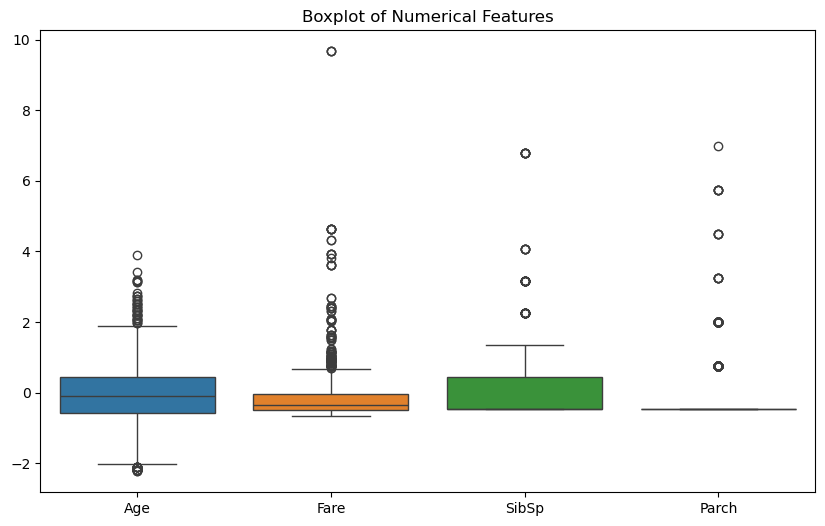

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numerical Features')
plt.show()


In [25]:
# Remove outliers using the IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [27]:
# Display the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df.shape)

# Display the first few rows of the cleaned dataset
df


Shape of the cleaned dataset: (577, 12)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,0.432793,-0.473674,113803,0.420730,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.433312,-0.474545,-0.473674,373450,-0.486337,True,False,True
5,6,0,3,"Moran, Mr. James",-0.104637,-0.474545,-0.473674,330877,-0.478116,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",-0.335187,-0.474545,-0.473674,SOTON/OQ 392076,-0.506472,True,False,True
886,887,0,2,"Montvila, Rev. Juozas",-0.181487,-0.474545,-0.473674,211536,-0.386671,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",-0.796286,-0.474545,-0.473674,112053,-0.044381,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",-0.258337,-0.474545,-0.473674,111369,-0.044381,True,False,False
